In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt



In [ ]:
training_df = pd.read_csv("/content/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


# Call the model functions

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


567/567 [==============================] - 1s 1ms/step - loss: 30634.3770 - root_mean_squared_error: 175.0268
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27836.2598 - root_mean_squared_error: 166.8420
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 27054.7539 - root_mean_squared_error: 164.4833
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26553.2266 - root_mean_squared_error: 162.9516
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25717.4395 - root_mean_squared_error: 160.3666
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 25044.4727 - root_mean_squared_error: 158.2545
Epoch 7/30
567/567 [==============================] - 1s 985us/step - loss: 24228.5039 - root_mean_squared_error: 155.6551
Epoch 8/30
567/567 [==============================] - 1s 982us/step - loss: 23740.1211 - root_mean_squared_error: 154.0783
Epoch 9/30
567/567 [===================

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


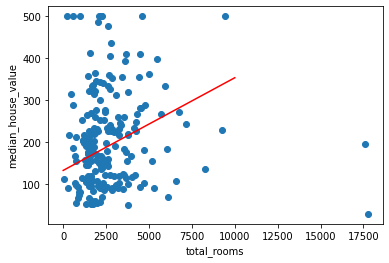

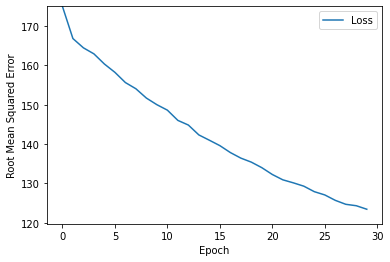

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Use the model to make predictions










In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

NameError: ignored

#  Judge the predictive power of the model

# Try a different feature

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
142/142 [==============================] - 1s 2ms/step - loss: 3613337.2500 - root_mean_squared_error: 1900.8781
Epoch 2/3
142/142 [==============================] - 0s 2ms/step - loss: 3079753.7500 - root_mean_squared_error: 1754.9227
Epoch 3/3
142/142 [==============================] - 0s 3ms/step - loss: 3083360.2500 - root_mean_squared_error: 1755.9500


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


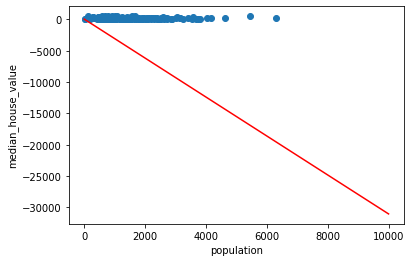

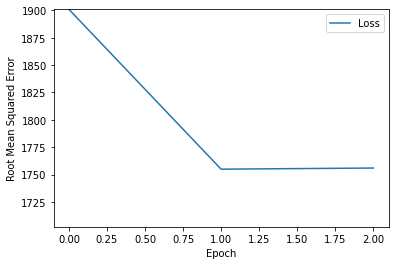

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53           -3955
 1867     92           -5761
 2191     69           -6768
 1052     62           -3227
 1647     80           -5077
 2312    295           -7144
 1604    500           -4943
 1066    342           -3271
  338    118           -1007
 1604    128           -4943
 1200    187           -3687
  292     80            -864
 2014    112           -6218
 1817     95           -5605
 1328     69           -4085


In [ ]:
my_feature = "population"  # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

#  Define a synthetic feature

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1700/1700 [==============================] - 2s 1ms/step - loss: 45690.7344 - root_mean_squared_error: 213.7539
Epoch 2/50
1700/1700 [==============================] - 2s 1ms/step - loss: 30687.3418 - root_mean_squared_error: 175.1780
Epoch 3/50
1700/1700 [==============================] - 2s 1ms/step - loss: 21589.9258 - root_mean_squared_error: 146.9351
Epoch 4/50
1700/1700 [==============================] - 2s 1ms/step - loss: 16947.2676 - root_mean_squared_error: 130.1817
Epoch 5/50
1700/1700 [==============================] - 2s 1ms/step - loss: 15498.5527 - root_mean_squared_error: 124.4932
Epoch 6/50
1700/1700 [==============================] - 2s 1ms/step - loss: 15195.5771 - root_mean_squared_error: 123.2703
Epoch 7/50
1700/1700 [==============================] - 2s 1ms/step - loss: 15182.1602 - root_mean_squared_error: 123.2159
Epoch 8/50
1700/1700 [==============================] - 2s 1ms/step - loss: 15221.4189 - root_mean_squared_error: 123.3751
Epoch 9/50
1700/

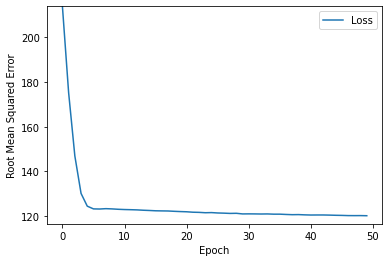

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             182
    2     92             199
    2     69             191
    2     62             213
    1     80             179
    2    295             233
    2    500             212
    2    342             230
    4    118             319
    2    128             217
    2    187             231
    3     80             245
    2    112             232
    2     95             224
    2     69             212


In [ ]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"]/ training_df["population"]# write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = .01
epochs = 50
batch_size = 10

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

#Find feature(s) whose raw values correlate with the label

In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


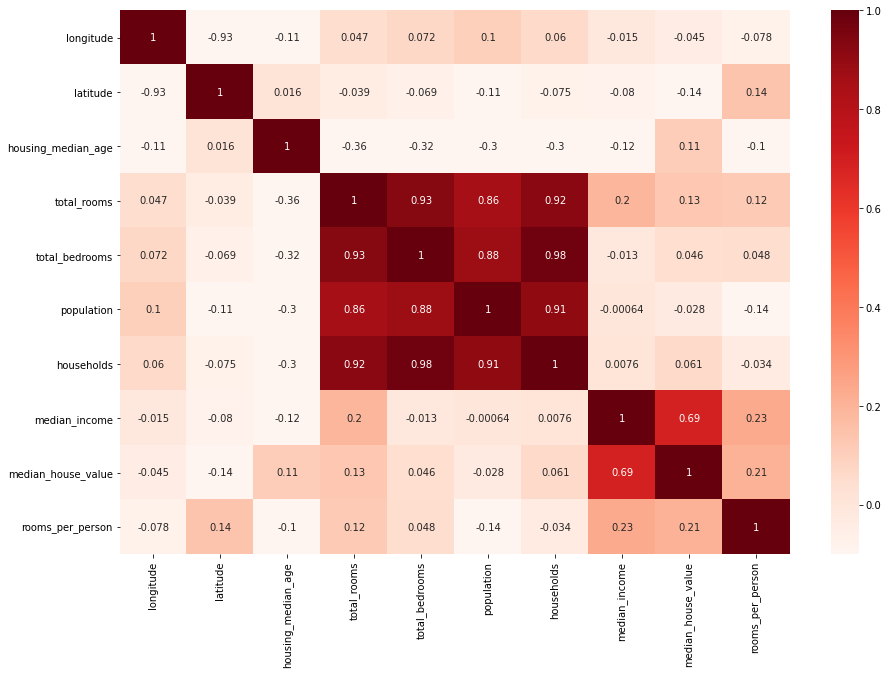

In [ ]:
import seaborn as sns
corrmatrix = training_df.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corrmatrix,vmin= -0.1, vmax= 1, annot=True, linewidths= 0, cmap="Reds")
plt.show()

In [ ]:
corrmatrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.0
median_income         0.7
rooms_per_person      0.2
total_rooms           0.1
housing_median_age    0.1
households            0.1
total_bedrooms        0.0
population           -0.0
longitude            -0.0
latitude             -0.1
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4441215d0>,
      dtype=object)

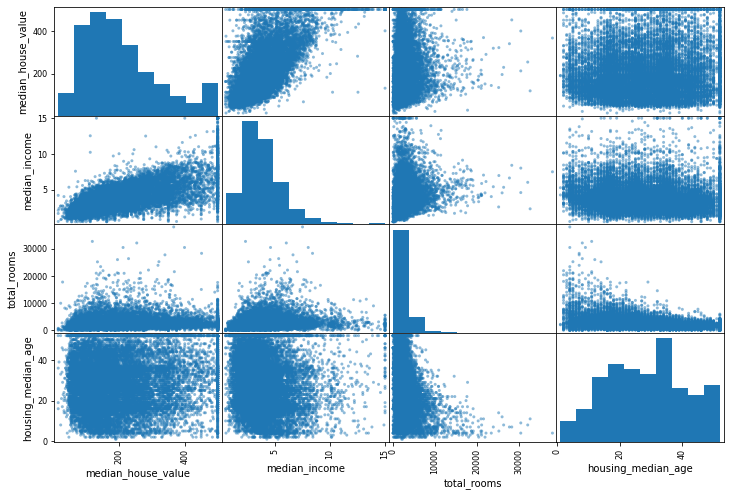

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(training_df[attributes], figsize=(12, 8))


In [ ]:
training_df["rooms_per_household"] = training_df["total_rooms"]/training_df["households"]
training_df["bedrooms_per_room"] = training_df["total_bedrooms"]/training_df["total_rooms"]
training_df["population_per_household"]=training_df["population"]/training_df["households"]

In [ ]:
corrmatrix = training_df.corr()
corrmatrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.0
median_income               0.7
rooms_per_person            0.2
rooms_per_household         0.2
total_rooms                 0.1
                           ... 
population                 -0.0
population_per_household   -0.0
longitude                  -0.0
latitude                   -0.1
bedrooms_per_room          -0.3
Name: median_house_value, Length: 13, dtype: float64

In [ ]:
training_df.isnull().sum()


longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
                           ..
median_house_value          0
rooms_per_person            0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
Length: 13, dtype: int64

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
1700/1700 [==============================] - 2s 1ms/step - loss: 38764.9609 - root_mean_squared_error: 196.8882
Epoch 2/500
1700/1700 [==============================] - 2s 1ms/step - loss: 16341.9912 - root_mean_squared_error: 127.8358
Epoch 3/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7757.3237 - root_mean_squared_error: 88.0757
Epoch 4/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7016.7192 - root_mean_squared_error: 83.7659
Epoch 5/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7013.8491 - root_mean_squared_error: 83.7487
Epoch 6/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7014.2500 - root_mean_squared_error: 83.7511
Epoch 7/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7013.7046 - root_mean_squared_error: 83.7479
Epoch 8/500
1700/1700 [==============================] - 2s 1ms/step - loss: 7013.5132 - root_mean_squared_error: 83.7467
Epoch 9/500
1700/170

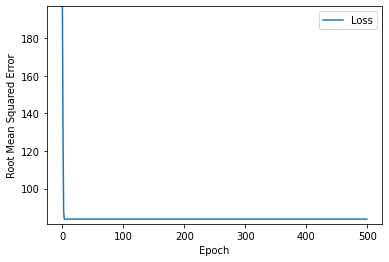

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             133
    4     92             211
    3     69             153
    2     62             131
    3     80             152
    2    295             147
   10    500             458
    5    342             260
    2    118             146
    4    128             220
    8    187             397
    3     80             162
    3    112             178
    4     95             221
    2     69             142


In [ ]:
my_feature = "median_income"

# Assign values to these three hyperparameters.
learning_rate = .01
epochs = 50
batch_size = 10

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [ ]:
training_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_person', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [ ]:
features=['median_income', 'rooms_per_person', 'rooms_per_household',
       'bedrooms_per_room']

In [ ]:
x=training_df.drop("median_house_value", axis = 1)

y=training_df["median_house_value"]

In [ ]:
from sklearn.preprocessing import StandardScaler 
scalar=StandardScaler()
x = scalar.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model2 = rf.fit(x_train, y_train)

In [ ]:
y_predict= model2.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test, y_predict)
r2=r2_score(y_test, y_predict)
print("MSE =",mse )
print("R2 Score =",r2)

MSE = 2617.1737349429086
R2 Score = 0.8093511237260995
